# 10. Locally Weighted Regression
<hr>
<blockquote><i>Q: Implement the <b>non-parametric Locally Weighted Regression Algorithm</b> in order to fit data points. Select appropriate data set for your experiment and draw graphs.</i></blockquote>
<hr>
<ul>
    <b>Breaking down the title:</b>
    <li><b>Regression</b>:<br>is basically a statistical approach to find the relationship between variables. Consider y = x, relationship between y and x is linear.<br>
    <figure style="float:left; padding-right: 50px;">
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSBFcEGfkCLBq2MwwTuWN9V5DUhyqe6oKXJbe66w4YZI9-O8A2S" width="350px"/>
        <figcaption style="font-size:8pt;"><i>Figure 1: Linear Regression, a straight line is plotted for the data items (House price dataset )</i>
     </figcaption>
    </figure>
        The image on the left side showing how <b>house price (y)</b> varies appoximately linear according to the <b>living area (x)</b>. Hence, we can say y = bx + a where b = slope of of the line & a = intercept to y axis ( means starting price for house size = 0 ).
    </li>
    <hr><br>
    <li><b>non - parametric</b> : <br>In normal regression the attribute ( parameter / column of X ) are driving force, to fit the equation according the data items. But, in non-parametric locally weighted regression, parameters are only used in regions. In general, parameters wont be considered as a whole but in regions.</li>
    <hr><br>
    <li><b>Locally Weighted Regression :</b><br>
        Dataset is divided into several regions. Those regions plot one-one <b>Straight Line</b>. Thus, number of regions determine the <b>fitness of the Curve</b>.
        <ol>
            <li> Underfit : Number of regions are <b>too less</b> that will not follow the pattern</li>
            <li> Overfit : Number of regions are <b>too high</b> that is too much jittery, like it follows all the datapoints</li>
            <li> Properfit: Follows the data pattern and is not too smooth not too jittery</li>
        </ol>
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSg6-uSpcY9Cu7BwZmw2rBgRwKokyCvlfuVypBaD7vA2-av2P0v" width="50%"/>
        <br><br>
        <img src="https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume4/cohn96a-html/img160.gif" width="350px" style="float: right"/> The right image, shows how within the region a line will be plotted.<br>
        The function used to get that local weight is, <b>Gaussian Function</b> which is <img src="https://miro.medium.com/max/413/0*fuo_MPGi0Bf2nqtj" height="40px"/> that is used in the function <br>
        <code>radial_kernel(x0, X, tau)</code>
        <br>
        Where, X - Center point, tau - is Standard Deviation which tells us how wide the region should be, that is the factor which determines Overfit, Underfit / Goodfit.
    </li>
    
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Generate your own dataset
Dataset is generated by equation
```
X = Some random 1000 Numbers between -3 to 3
Y = log(|X^{2}-1|+0.5)
```
Real data will not be smooth hence, we add some jitter to it,
So, added some random values to X

```
X += np.random.normal(scale=0.1, size=n)
```

And then domain, is the value you want to predict, which is also in the range -3 to 3 ( Some random X values)

In [33]:
n = 1000
X = np.linspace(-3,3, num=n)
Y = np.log(np.abs(X**2-1)+0.5)
X += np.random.normal(scale=0.1, size=n)
domain = np.linspace(-3,3,num=300)

### 2. Predict
There is little bit of maths down there, But at the end you must make sure everything is in order ( Bcz Multiplication is involved ).
1. Radial Kernel : Gausan function which is giving thtat local fit.
    The equation is given in the above picture (if u read it its fine)
2. local_regression: Function which return one point of value ( that is y0 for given x0).
    Here few things are going on.
    
    - x0 - the value for which you want to predict
    - X - Dataset attribute point
    - Y - Label for that data
    - tau - Standard Deviation (provided by the user)
    <hr>
    
    1. Change x0 to [1, x0]
    2. Change X = [1,2,3,..] to X = [[1,1],[1,2],[1,3],... ] This is a 2d Matrix. Bcz later you have to subtract with x0 which is also 1x2 matrix.
    3. xw = XTranspose * RadialFunction 
    4. beta = (xw * X)^{-1}* xw * Y
    5. return x0 * beta
    Here * means the dot product ( Matrix Multiplication ). np.linealg.pinv(X) Just does is, returns inverse of X ie. (X)^{-1}

In [34]:
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((x0-X)**2, axis=1)/(-2*tau**2))


def local_regression(x0, X, Y, tau):
    x0 = np.r_[1,x0]
    X = np.c_[np.ones(len(X)),X]
    xw = X.T * radial_kernel(x0, X, tau)
    beta = np.linalg.pinv(xw @ X) @ xw @ Y
    return x0 @ beta

### 3. Plot it
The prediction for each value of domain is done by for loop to call to the function ```local_regression```.
Now, prediction contains a list which has predicted value of domains using the trend of X and Y.
<hr>
```matplotlib.pyplot``` library used for plotting. And just do as written.<br>
<b>Important :
Please do use <code>plt.show()</code><b>

In [35]:
def plot_lwr(tau):
    prediction = [local_regression(x0,X,Y,tau) for x0 in domain]
    plt.title('tau = '+str(tau))
    plt.scatter(X, Y, alpha=0.2, label='Dataset')
    plt.plot(domain, prediction, color='red', label='Predicted')
    plt.legend()
    plt.show()

Just give some different ```tau``` value and call ```plot_lwr(tau)```. See the graph.
<hr>
Observe that,
<ul><li>tau=10 : Underfit</li>
    <li>tau=1 : Underfit </li>
    <li>tau=0.1 : Goodfit </li>
    <li>tau= 0.01 : Overfit </li>
</ul>

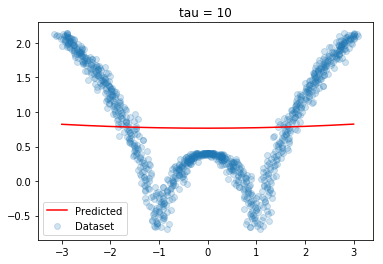

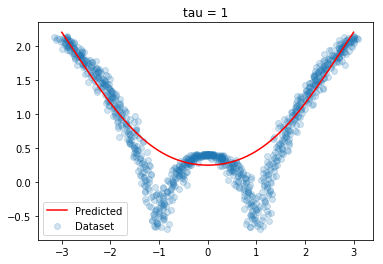

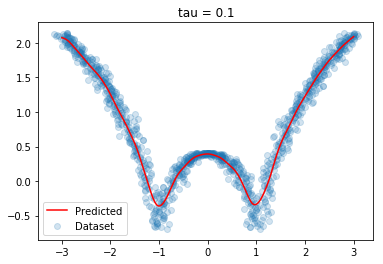

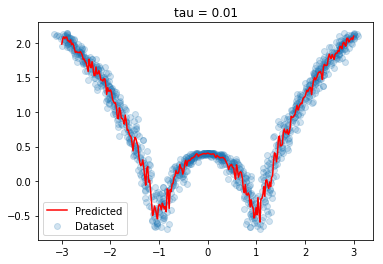

In [36]:
plot_lwr(10)
plot_lwr(1)
plot_lwr(0.1)
plot_lwr(0.01)

``` Any doubts contact : Adarsh Revankar ```